### K-Nearest Neighbour

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sb
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.tree import plot_tree
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn import preprocessing, linear_model, neighbors
from sklearn.model_selection import cross_val_score
from matplotlib import pyplot

%matplotlib inline

# import data
churn_data = pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn_R2.csv')

# set target data
churn_target = churn_data.iloc[:,-1]

# set feature data
churn_data.drop(["customerID","Churn"], axis=1, inplace=True)

# set training and test variables
X = np.array(churn_data)
y = np.array(churn_target)

# set variables for target and features
features = list(churn_data)
targets = list(churn_target)

# divide data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 100)

# set seaborn style and fontsize
sb.set_style('ticks')
sb.set_context('paper', font_scale=1.6)

In [ ]:
import time

scaler = StandardScaler()

scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

# initialize the class with the number of neighbours wanted
classifier = KNeighborsClassifier(n_neighbors=5)

#fit the model and time it
start = time.time()

classifier.fit(X_train, y_train)

stop = time.time()

print(f"Training: {stop - start} seconds")
print()

y_pred = classifier.predict(X_test)
print(y_pred)

print (f"Accuracy: {accuracy_score(y_test,y_pred)*100}%")
print()

# plot confusion matrix
sb.heatmap(confusion_matrix(y_test, y_pred),annot=True,cmap='Blues', fmt='g')

In [ ]:
# plot classification report
clf_report = classification_report(y_test,
                                   y_pred,
                                   output_dict=True)
sb.heatmap(pd.DataFrame(clf_report).iloc[:-1, :].T, annot=True)

<AxesSubplot:>

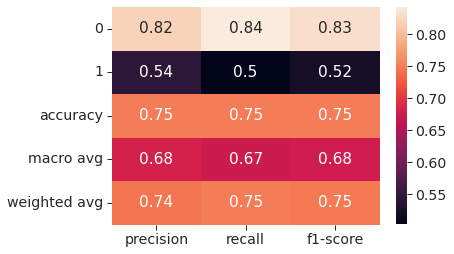

In [3]:
# plot classification report
clf_report = classification_report(y_test,
                                   y_pred,
                                   output_dict=True)
sb.heatmap(pd.DataFrame(clf_report).iloc[:-1, :].T, annot=True)

Text(0, 0.5, 'Mean Error')

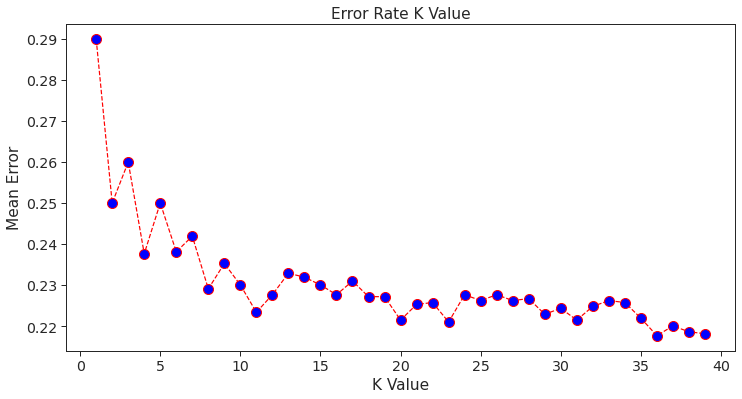

In [4]:
error = []

# Calculating error for K values between 1 and 40
for i in range(1, 40):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    pred_i = knn.predict(X_test)
    error.append(np.mean(pred_i != y_test))

plt.figure(figsize=(12, 6))
plt.plot(range(1, 40), error, color='red', linestyle='dashed', marker='o',
         markerfacecolor='blue', markersize=10)
plt.title('Error Rate K Value')
plt.xlabel('K Value')
plt.ylabel('Mean Error')